# Pandas: 
### - Concatenating and Joining DataFrames
### - Visualising data in DataFrames

<strong> <h2> Run The Following Code </h2> </strong>

Hit SHIFT + ENTER when your cusor is inside the cell of code.<br/>

## Importing and Checking the Data

In [1]:
!pip install wget
import wget
wget.download('https://d17lzt44idt8rf.cloudfront.net/data-week-08.zip')
!unzip 'data-week-08.zip' -d .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=60e77006a8cb77e265a747ed273703ecc34d5d8304a6fb472810f99796b1e81b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Archive:  data-week-08.zip
   creating: ./data/
   creating: ./data/0_raw_data/
   creating: ./data/0_raw_data/full/
  inflating: ./data/0_raw_data/full/flat_info_by_address.csv  
   creating: ./data/0_raw_data/full/hdb_resale_datasets_by_years/
  inflating: ./data/0_raw_data/full/hdb_resale_datasets_by_years/2012.csv  
  inflating: ./data/0_raw_data/full/hdb_resale_datasets_by_years/2013.csv  
  inflating: ./data/0_raw_data/full/hdb_resale_datasets_by_years/2014.csv  
  inflating: ./data/0_raw_data/full/hdb_resale_datasets_by_years/2015.csv  
  inflating: ./data/0_raw_data/full/

> Data Preparation. Importing pandas

In [2]:
import pandas as pd

In [3]:
# Import the two plotting packages (don't have to use both)
## Package: Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Package: Seaborn
import seaborn as sns

In [4]:
# These two lines are to set the size of the plot/chart
## For Matplotlib
plt.rc('figure', figsize=(16,9))
## For Seaborn
sns.set(rc= {"figure.figsize": (16, 9)})

> Open up a CSV file

In [6]:
hdb = 'data/0_raw_data/sample/years/hdb_resale_sample_raw_2012.csv'

df = pd.read_csv(hdb)

> viewing the contents of the dataset

The main dataset that we will work on is on HDB resale data.<br/>
See the description below for the fields given. <br/>
<br/>
<table>
    <tr><th>Field</th><th>Description</th></tr>
    <tr><td>Trans_YearMonth</td><td>year-month (YYYY-MM) for transaction</td></tr>
    <tr><td>town</td><td>town for the resale flat</td></tr>
    <tr><td>flat_type</td><td>flat type for the resale flat</td></tr>
    <tr><td>block</td><td>block for the resale flat</td></tr>
    <tr><td>street_name</td><td>street for the resale flat</td></tr>
    <tr><td>storey_range</td><td>storey range for the resale flat</td></tr>
    <tr><td>floor_area_sqm</td><td>floor area in square meter</td></tr>
    <tr><td>flat_model</td><td>model of resale flat</td></tr>
    <tr><td>lease_commence_date</td><td>year of lease commencement</td></tr>
    <tr><td>resale_price</td><td>price of the resale flat</td></tr>
</table>

In [7]:
df.shape #num of rows and columns 15000 rows, 10 columns

(1950, 9)

In [8]:
df.head() #first 5 rows of data

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000


## Concatenating DataFrames (with .concat)

> Concatenating DataFrames

In [9]:
import os

In [10]:
os.listdir() #prints out current working directory

['.config', 'data-week-08.zip', 'data', 'sample_data']

In [11]:
os.listdir('data/0_raw_data/sample/years') #prints out files in specific path

['hdb_resale_sample_raw_2012.csv',
 'hdb_resale_sample_raw_2014.csv',
 'hdb_resale_sample_raw_2013.csv',
 'hdb_resale_sample_raw_2019.csv',
 'hdb_resale_sample_raw_2016.csv',
 'hdb_resale_sample_raw_2020.csv',
 'hdb_resale_sample_raw_2018.csv',
 'hdb_resale_sample_raw_2017.csv',
 'hdb_resale_sample_raw_2015.csv',
 'hdb_resale_sample_raw_2021.csv']

In [12]:

folder_path = 'data/0_raw_data/sample/years'

dfs_list = []
for filename in os.listdir(folder_path): #loop through the files and save dataframes
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_list.append(df_temp)
    print("appended " + filename + " with " + str(len(df_temp)) + " rows to the list of DataFrames")

appended hdb_resale_sample_raw_2012.csv with 1950 rows to the list of DataFrames
appended hdb_resale_sample_raw_2014.csv with 1320 rows to the list of DataFrames
appended hdb_resale_sample_raw_2013.csv with 1491 rows to the list of DataFrames
appended hdb_resale_sample_raw_2019.csv with 1654 rows to the list of DataFrames
appended hdb_resale_sample_raw_2016.csv with 1523 rows to the list of DataFrames
appended hdb_resale_sample_raw_2020.csv with 1610 rows to the list of DataFrames
appended hdb_resale_sample_raw_2018.csv with 1631 rows to the list of DataFrames
appended hdb_resale_sample_raw_2017.csv with 1641 rows to the list of DataFrames
appended hdb_resale_sample_raw_2015.csv with 1562 rows to the list of DataFrames
appended hdb_resale_sample_raw_2021.csv with 618 rows to the list of DataFrames


In [13]:
#concatenate dataframes
df = pd.concat(dfs_list)
#notice the index is off because it follows respective dataframes index
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500.0
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000.0
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000.0
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000.0
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000.0
...,...,...,...,...,...,...,...,...,...
613,2021-04,5 ROOM,230,LOR 8 TOA PAYOH,01 TO 03,119.0,Standard,1976,430000.0
614,2021-04,5 ROOM,229,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,510000.0
615,2021-04,3 ROOM,6,MARSILING DR,01 TO 03,65.0,Improved,1976,268000.0
616,2021-04,3 ROOM,13,MARSILING LANE,07 TO 09,76.0,Improved,1976,240000.0


In [14]:
#concatenate dataframes
df = pd.concat(dfs_list, ignore_index=True) #concatenate dataframes
#notice the index is now correct
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500.0
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000.0
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000.0
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000.0
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000.0
...,...,...,...,...,...,...,...,...,...
14995,2021-04,5 ROOM,230,LOR 8 TOA PAYOH,01 TO 03,119.0,Standard,1976,430000.0
14996,2021-04,5 ROOM,229,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,510000.0
14997,2021-04,3 ROOM,6,MARSILING DR,01 TO 03,65.0,Improved,1976,268000.0
14998,2021-04,3 ROOM,13,MARSILING LANE,07 TO 09,76.0,Improved,1976,240000.0


## Joining DataFrames (with .merge)

> Joining DataFrames (with an simple example)

In [15]:
df1 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Mutu"], "class": ["a", "b", "b"]})
df1

,Name,class
0,Ali,a
1,Ah Ming,b
2,Mutu,b


In [16]:
df2 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Ah Ming", "Siti"], "subject": ["eng", "eng", "math", "math"], "score": [85, 25, 76, 80]})
df2

,Name,subject,score
0,Ali,eng,85
1,Ah Ming,eng,25
2,Ah Ming,math,76
3,Siti,math,80


In [17]:
# You can experimenting with the "left", "right", "inner", "outer" on the 'how' parameter to see the impacts
df1.merge(df2, how='left', on='Name')

,Name,class,subject,score
0,Ali,a,eng,85.0
1,Ah Ming,b,eng,25.0
2,Ah Ming,b,math,76.0
3,Mutu,b,NaN,NaN


> Joining DataFrames (using HDB dataset)

In [18]:
df_mapping_streetname_to_town = pd.read_csv('data/0_raw_data/sample/hdb_resale_sample_raw_towns.csv') #towns dataframe

In [19]:
df_mapping_streetname_to_town.head()

,town,street_name
0,JURONG EAST,TEBAN GDNS RD
1,GEYLANG,BALAM RD
2,QUEENSTOWN,C'WEALTH CL
3,QUEENSTOWN,C'WEALTH DR
4,TOA PAYOH,LOR 1 TOA PAYOH


In [20]:
df_dataset = pd.merge(df, df_mapping_streetname_to_town, how='left', on='street_name') #joined dataframe

In [21]:
# To delete a variable (and erase the memory)
del df_dataset

<br/>

---

---

# Visualising Data in DataFrames

In [22]:
# Ignore the " DtypeWarning" warning
df = pd.read_csv('data/1_processed_data/hdb_resale_sample_processed.csv')

---

## Charts that doesn't need groupby
- These charts can use raw data, without aggregating the data first
- These are charts that shows entire distribution of the data.

### Histogram
Good to show distribution of data

<Axes: ylabel='Frequency'>

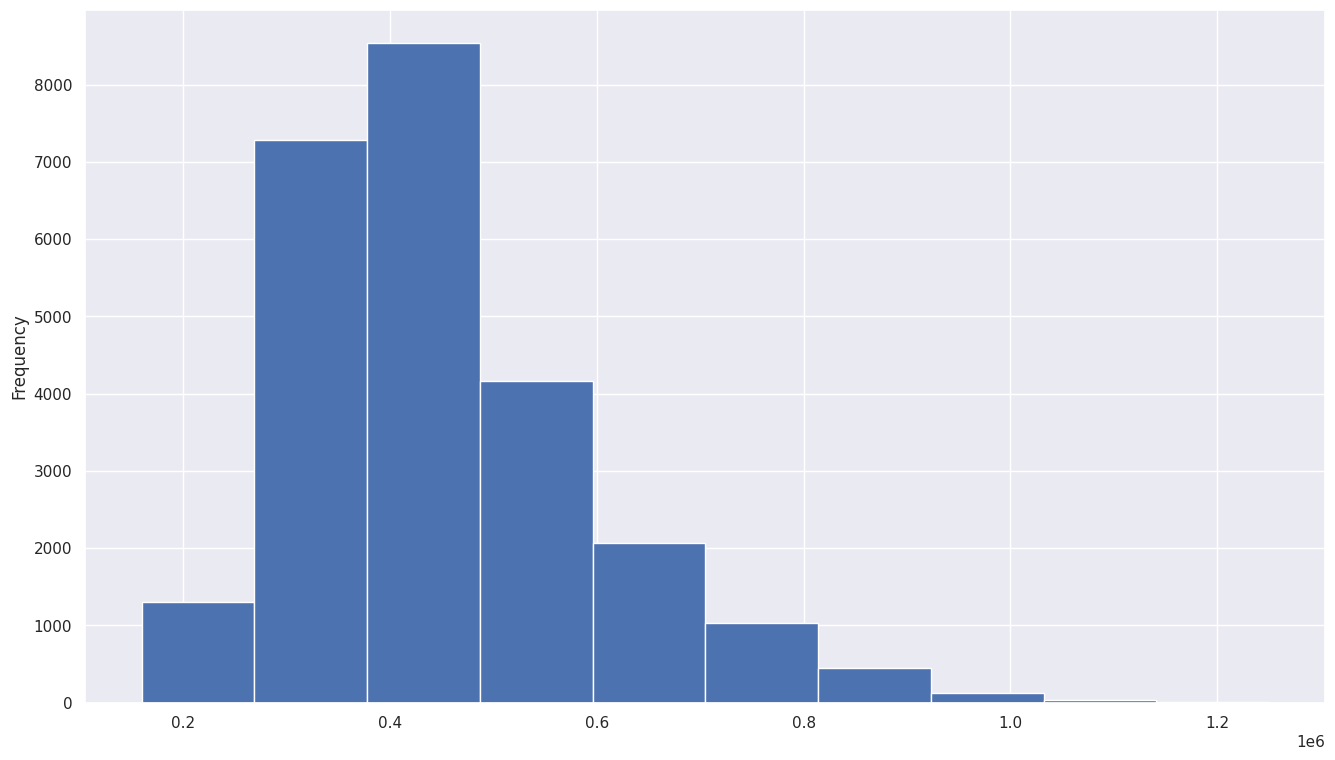

In [23]:
df['resale_price'].plot.hist()

## Scatterplot
Good to show relationships between 2 numerical fields

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

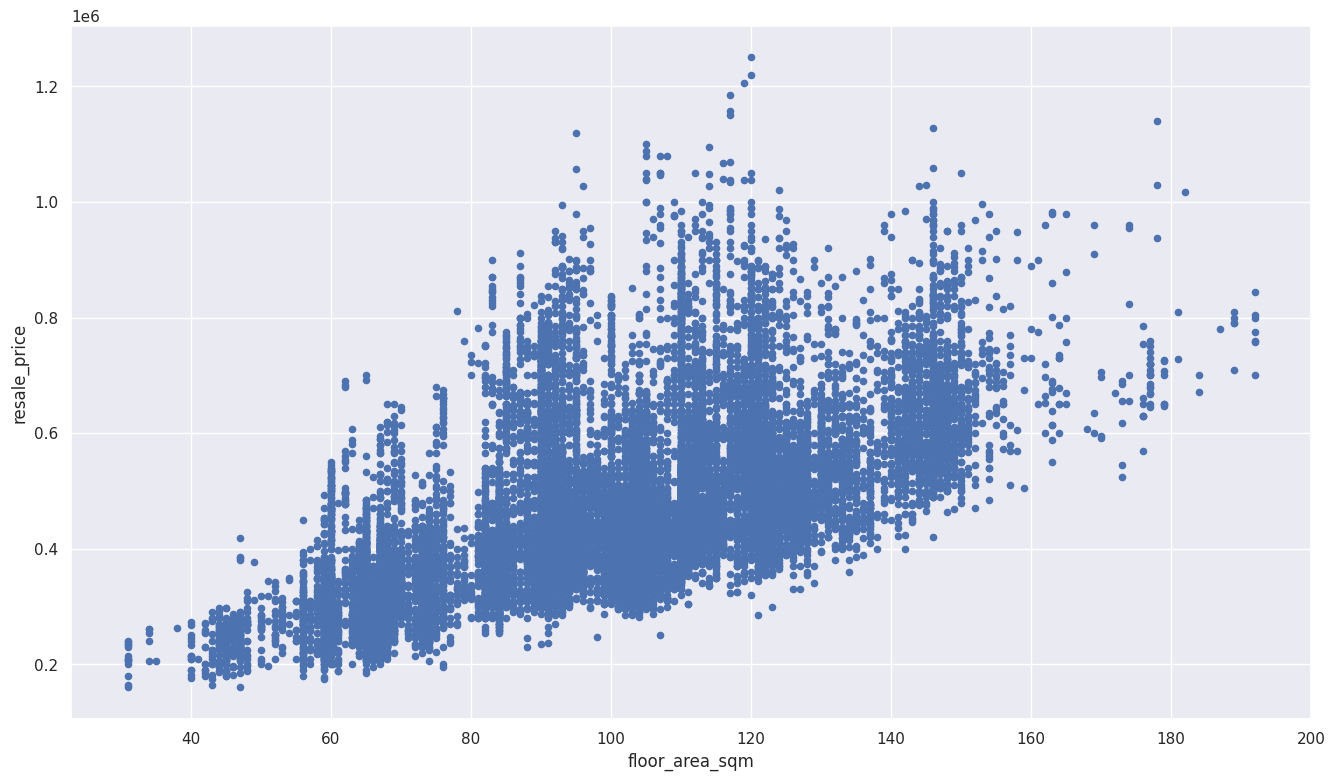

In [24]:
df.plot.scatter('floor_area_sqm', 'resale_price')

## Boxplot
Good to describe numerical fields

![Boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

<Axes: >

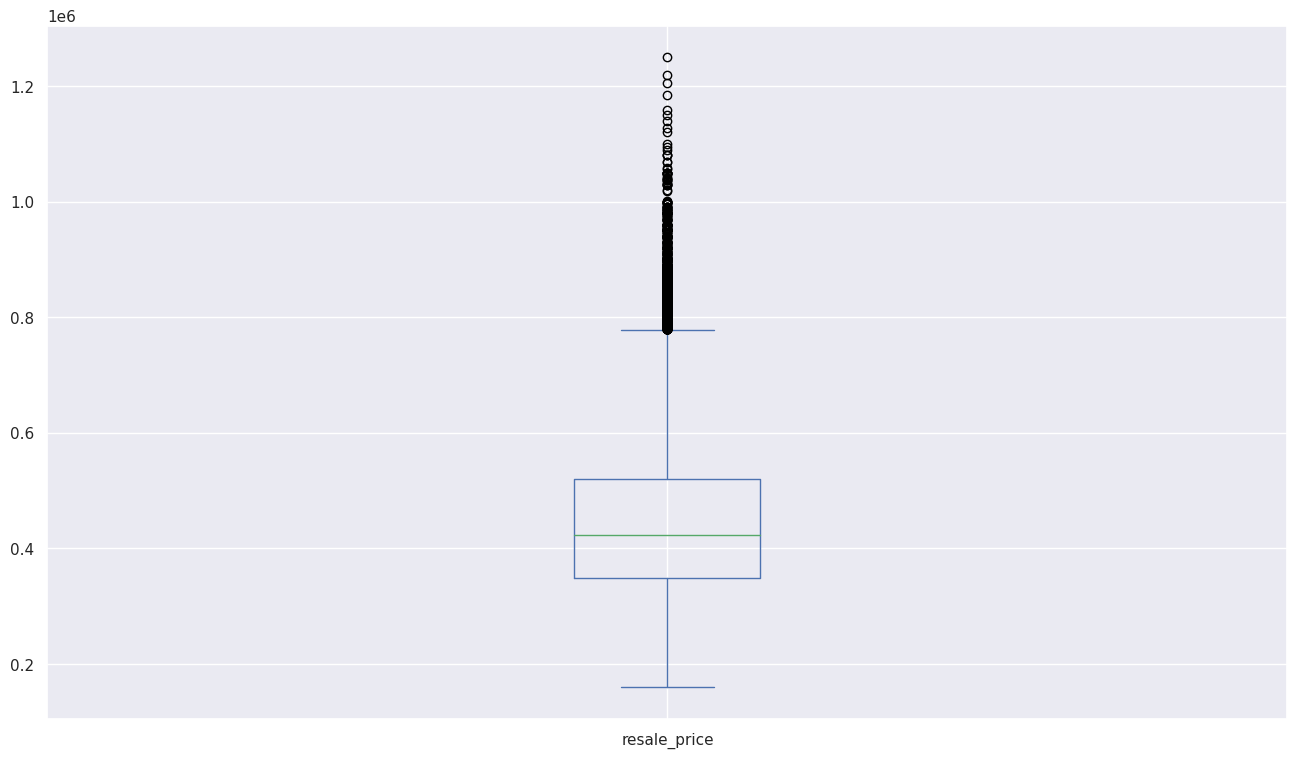

In [25]:
# The number of y-axis is the scientific notation of numbers (just like our scientific calculator)
df['resale_price'].plot.box()

---

# Charts that need groupby
These are charts that require some groupby aggregation 

### Line Chart
Good to show time trends

<Axes: xlabel='lease_commence_date'>

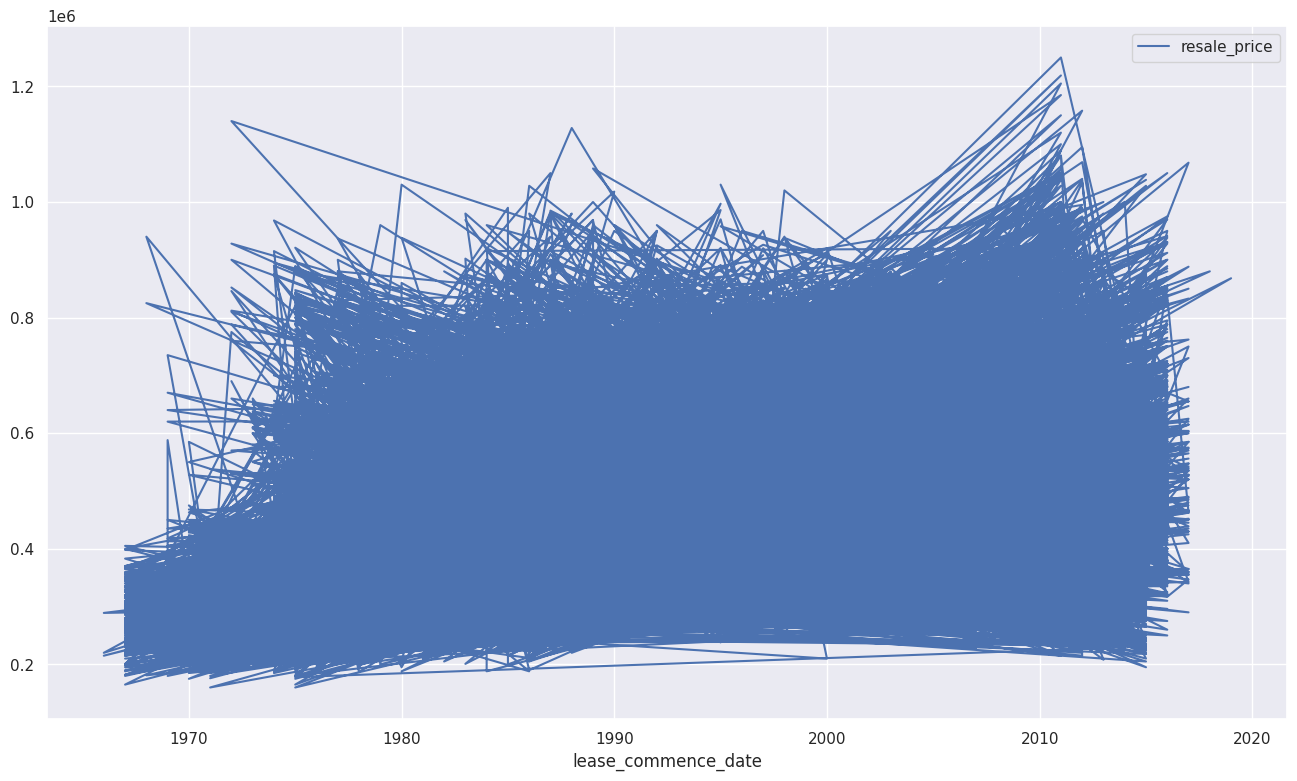

In [26]:
df.plot.line(x='lease_commence_date', y='resale_price')

<Axes: xlabel='lease_commence_date'>

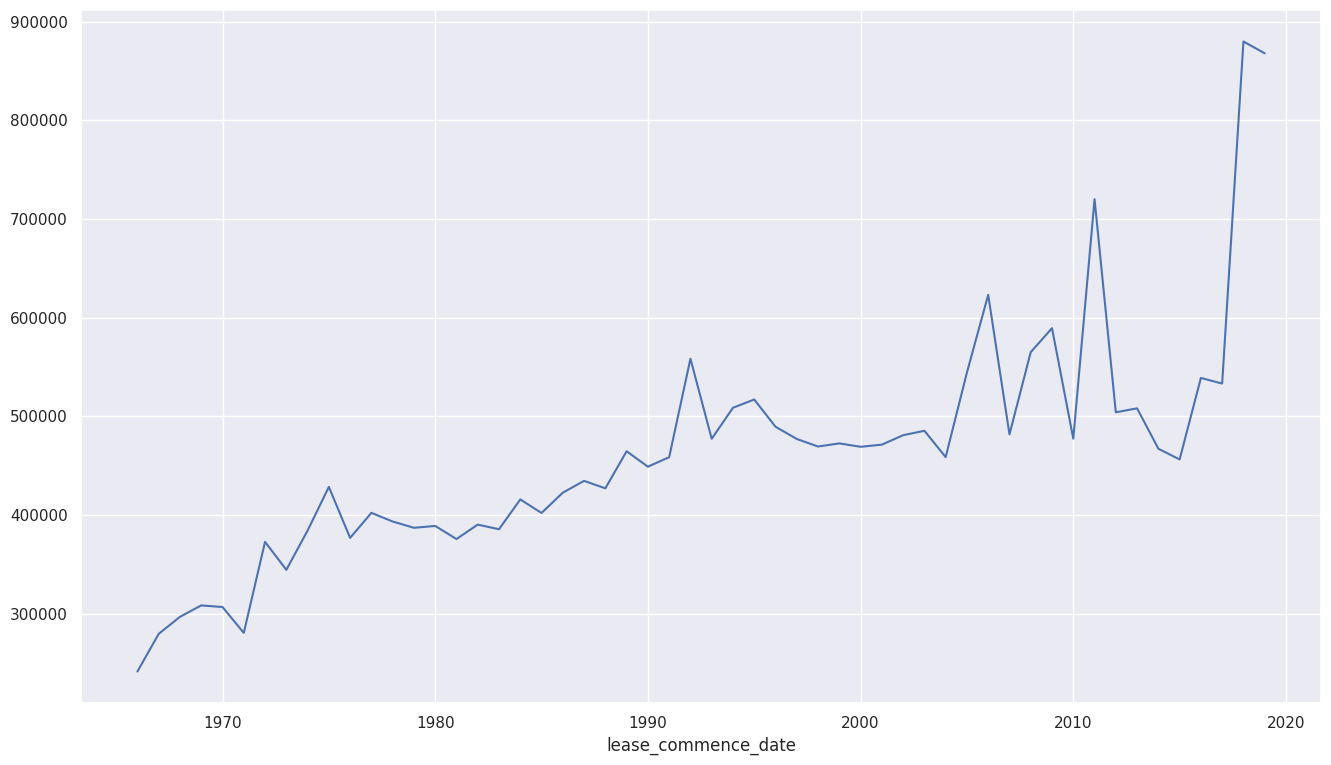

In [27]:
byyear = df.groupby('lease_commence_date')
pricebyyear = byyear['resale_price'].mean()
pricebyyear.plot.line(x='lease_commence_date', y='resale_price')

> Multiple lines

Need to create a table as below.
   <table>
    <tr><th></th><th>line1</th><th>line2</th><th>line3</th></tr>
    <tr><td><b>year1</b></td><td>line1_year1_values</td><td>line2_year1_values</td><td>line3_year1_values</td></tr>
    <tr><td><b>year2</b></td><td>line1_year2_values</td><td>line2_year2_values</td><td>line3_year2_values</td></tr>
    <tr><td><b>year3</b></td><td>line1_year3_values</td><td>line2_year3_values</td><td>line3_year3_values</td></tr>
   </table>
   
We can use the pivot function to help us.

<Axes: xlabel='lease_commence_date'>

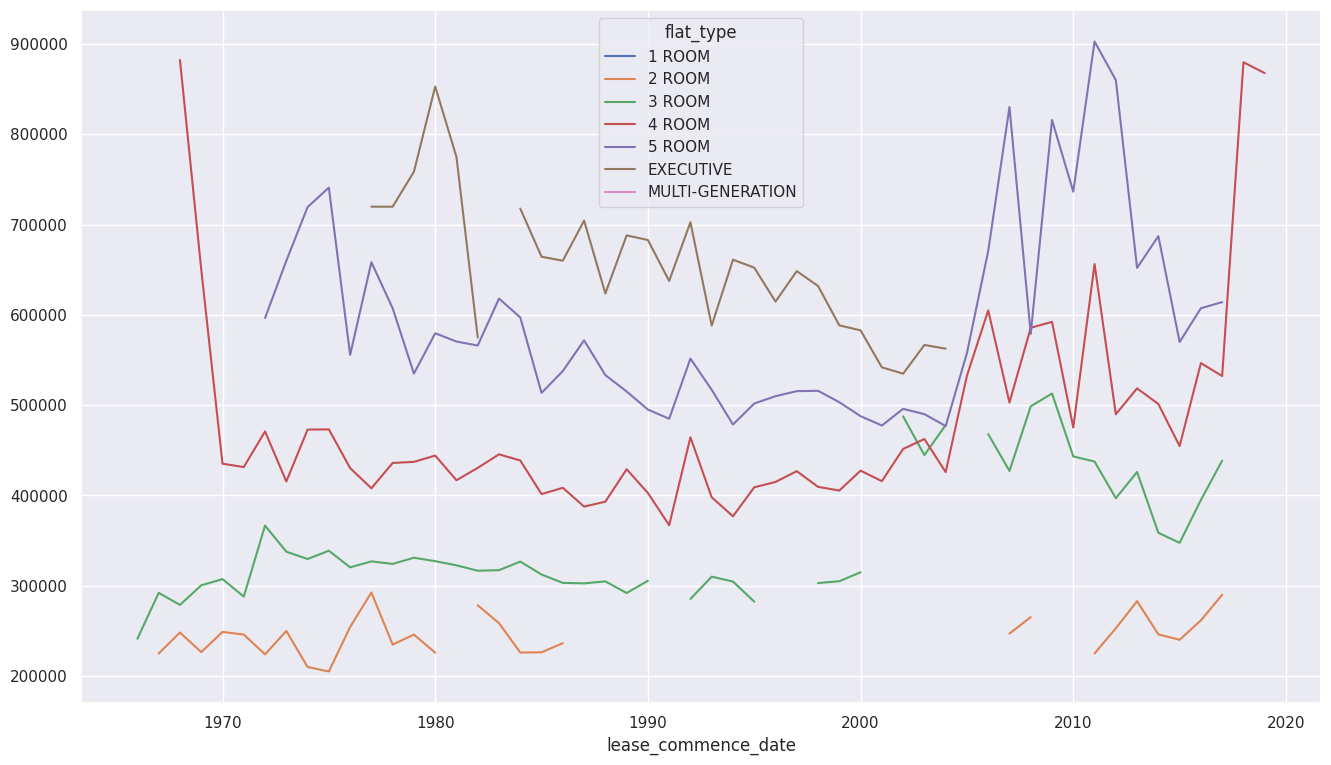

In [28]:
df.pivot_table('resale_price', 'lease_commence_date', 'flat_type', 'mean').plot.line()

<Axes: xlabel='lease_commence_date'>

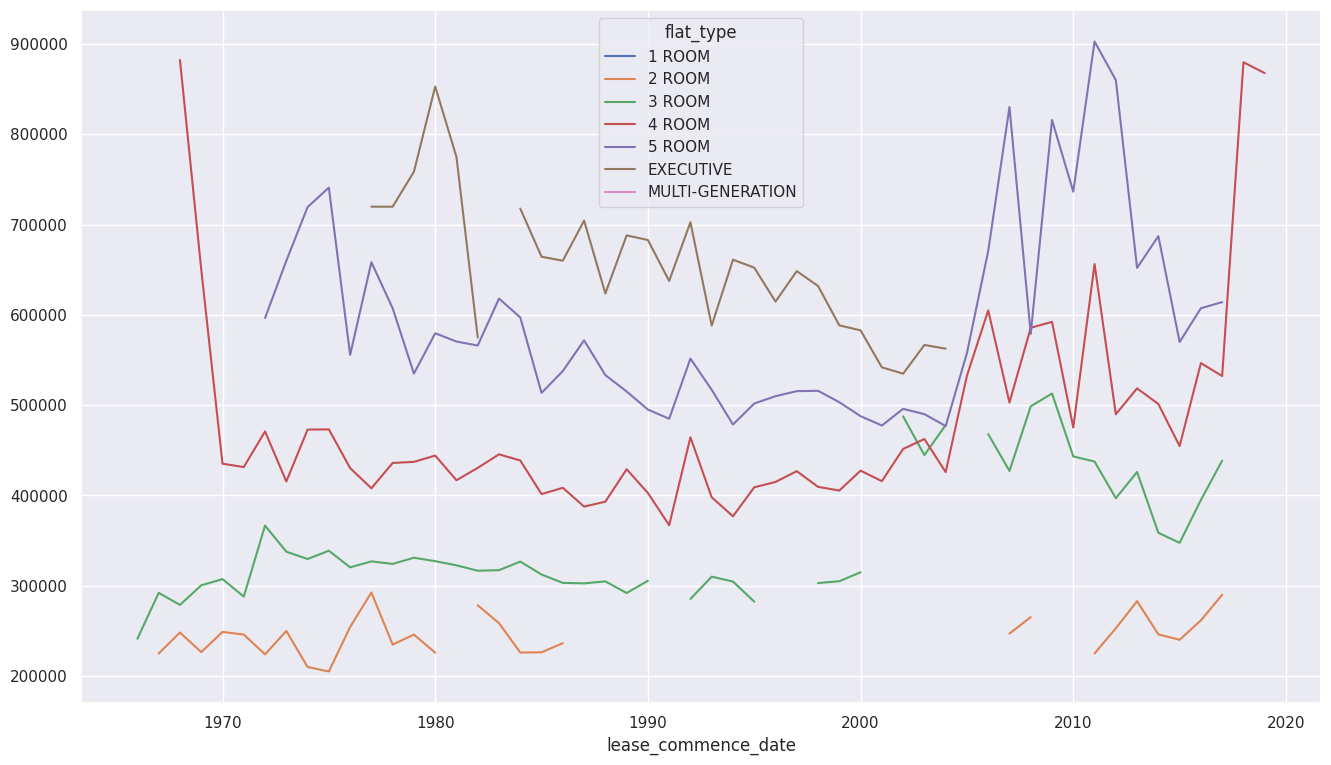

In [29]:
byyearft = df.groupby(['lease_commence_date','flat_type'], as_index=False)
pricebyyearft = byyearft['resale_price'].mean()
pivot = pricebyyearft.pivot(index='lease_commence_date', columns='flat_type', values='resale_price')
pivot.plot.line()

## Bar
Good to compare between categories

In [30]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

<Axes: xlabel='flat_type'>

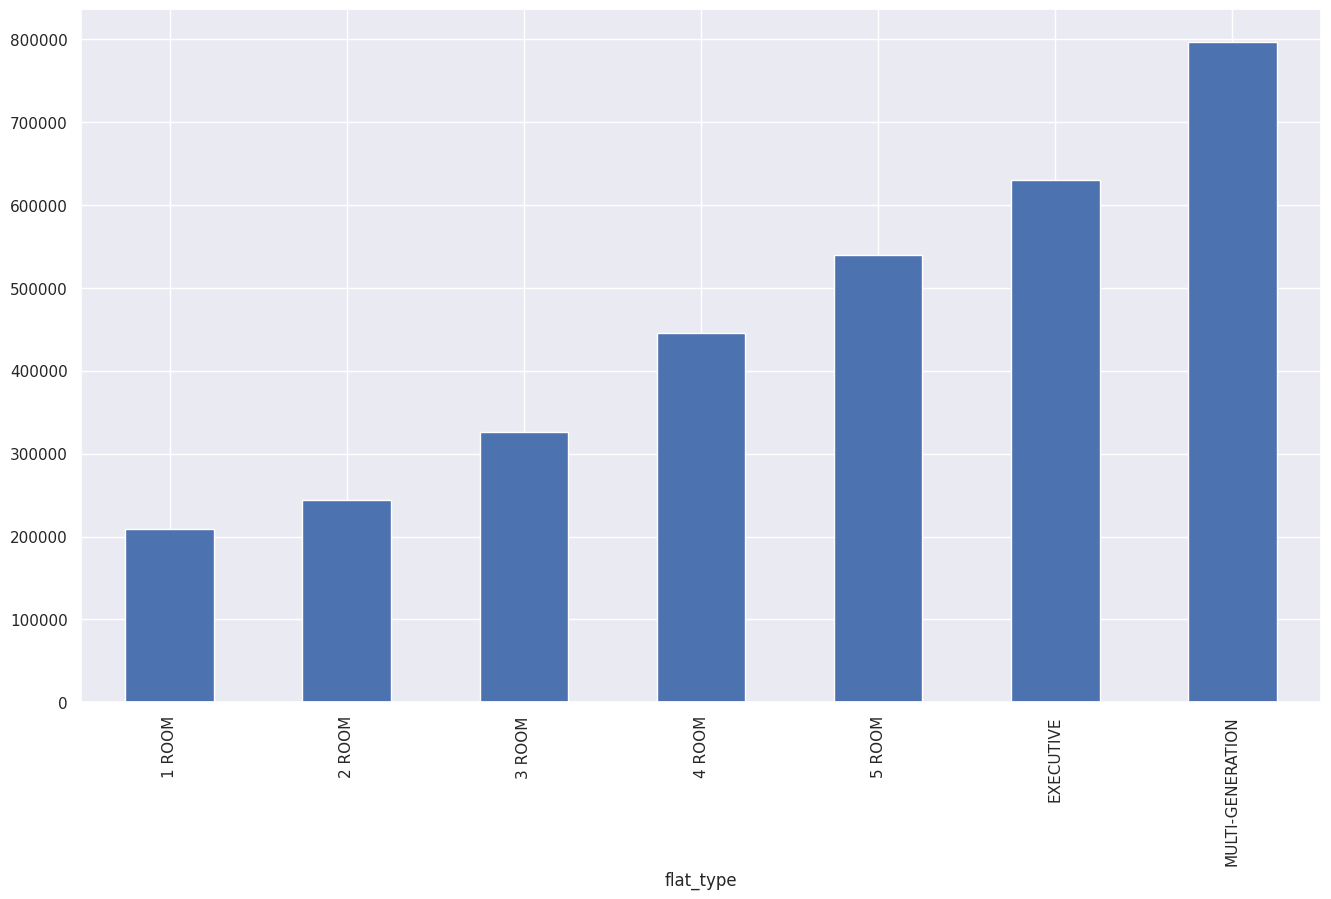

In [31]:
byflattype = df.groupby('flat_type')
pricebyflattype = byflattype[['resale_price','price_per_sqm']].mean()
pricebyflattype['resale_price'].plot.bar()

<Axes: xlabel='flat_type'>

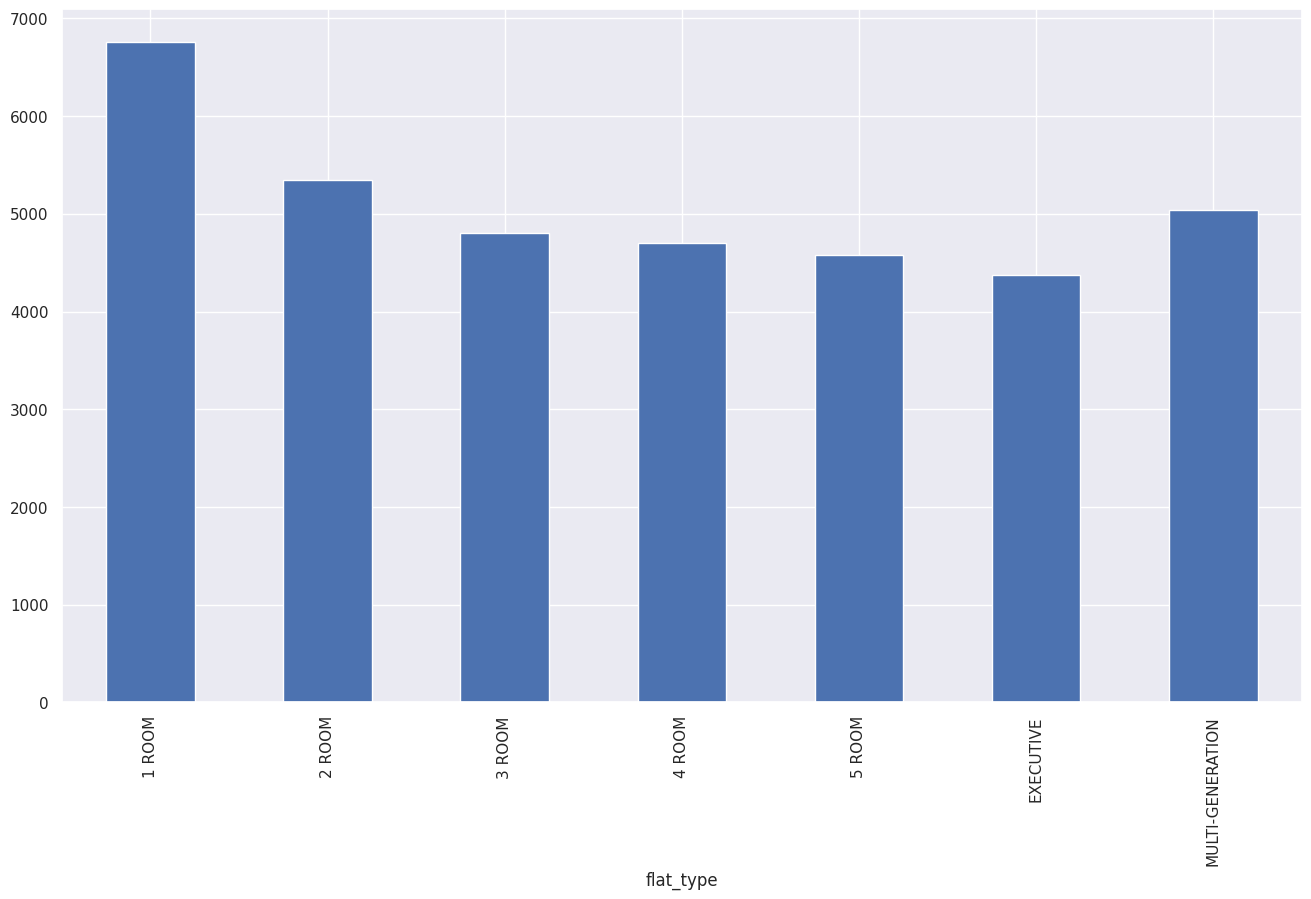

In [32]:
pricebyflattype['price_per_sqm'].plot.bar()

> multiple axis

## Seaborn for Data Exploration 

- You can see seaborn is much intuitive and easier to use
- we don't have to aggregate the numbers before passing to the seaborn 
- It allows us to generate comprehensive charts that can be used to understand the data, with very little codes

<Axes: xlabel='flat_type', ylabel='price_per_sqm'>

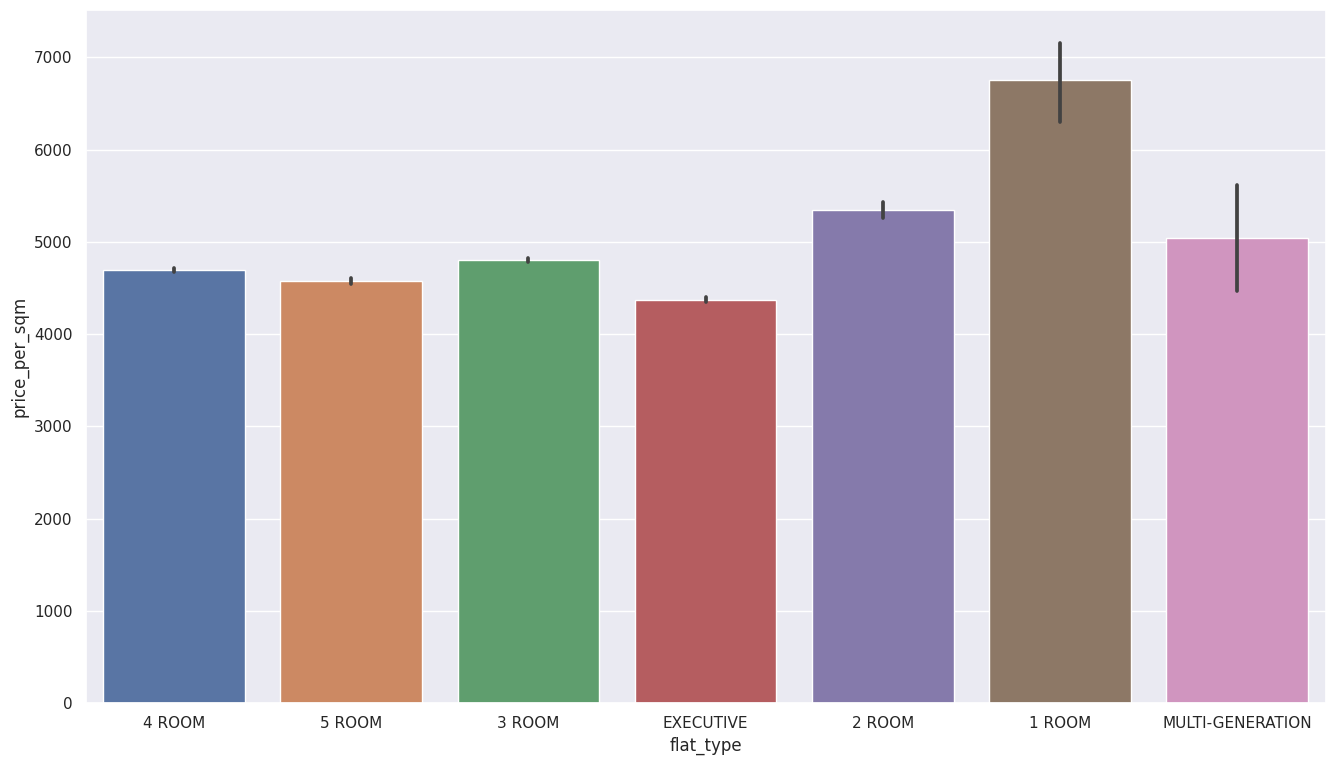

In [33]:
# Notice that no aggregation is required
sns.barplot(x='flat_type', y='price_per_sqm', data=df)

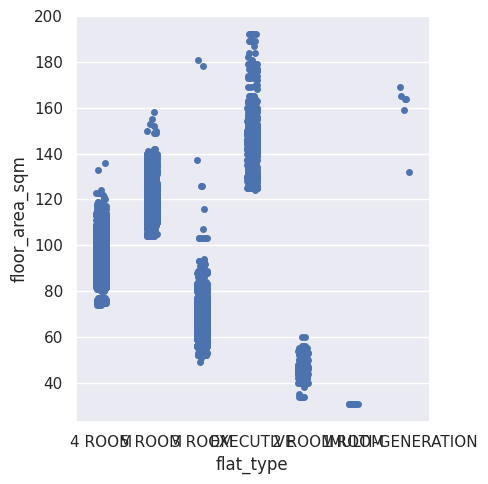

In [34]:
# Seaborn also offers charts that can efficiently visualise the individual data points
# To help us better understanding the data and potentially observe odds data points
sns.catplot(x='flat_type', y='floor_area_sqm', data=df)

<Axes: xlabel='floor_area_sqm', ylabel='price_per_sqm'>

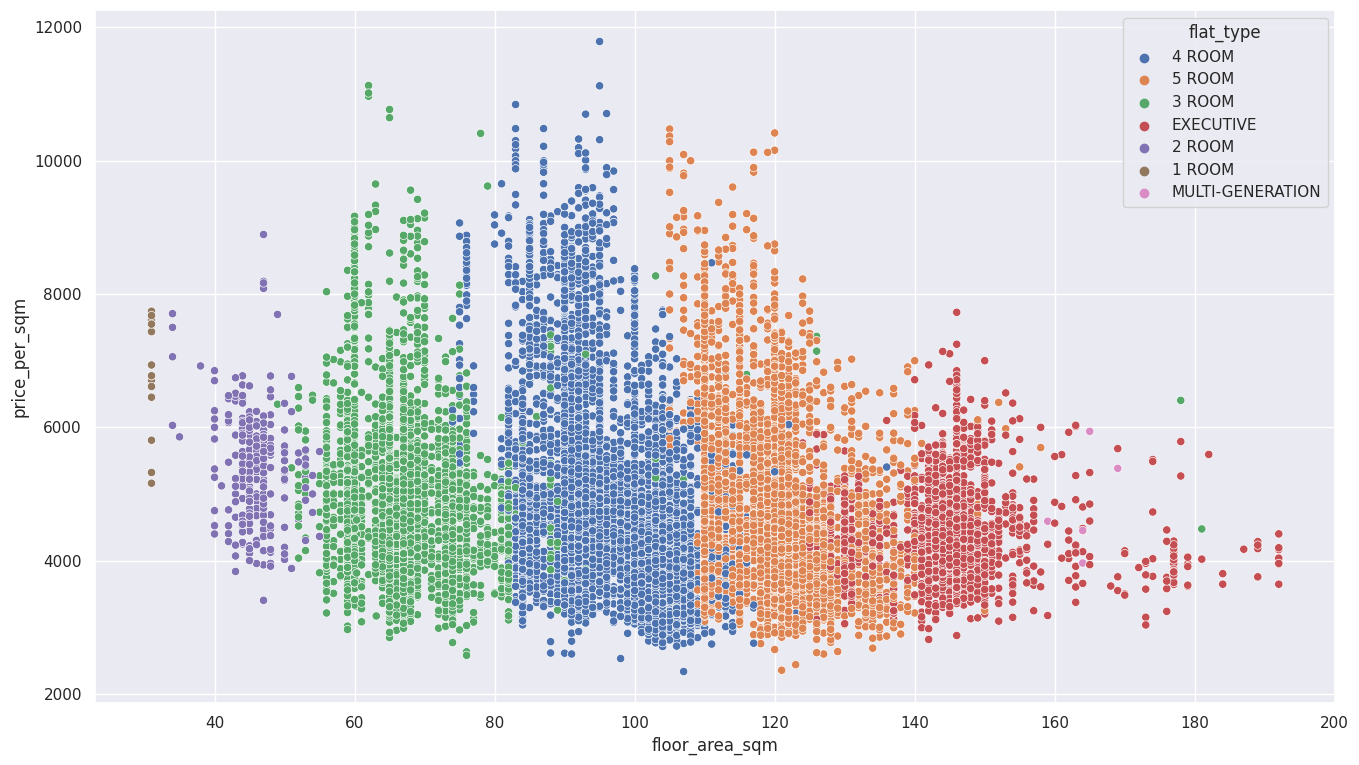

In [35]:
# Seaborn's scatterplot can be useful for exploring multi-dimensional data


sns.scatterplot(x='floor_area_sqm', y='price_per_sqm', hue='flat_type', data=df)

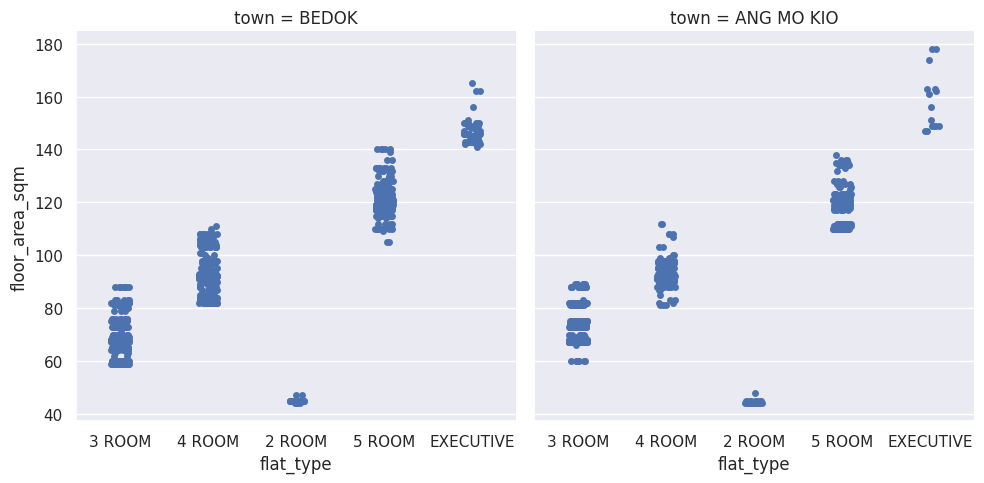

In [36]:
# Create a subset of dataset for visualisation
df_subset = df[(df['town'] == 'ANG MO KIO') | (df['town'] == 'BEDOK')]

# Seaborn can be used to quickly explore the characteristics of data
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town',
            data=df_subset)

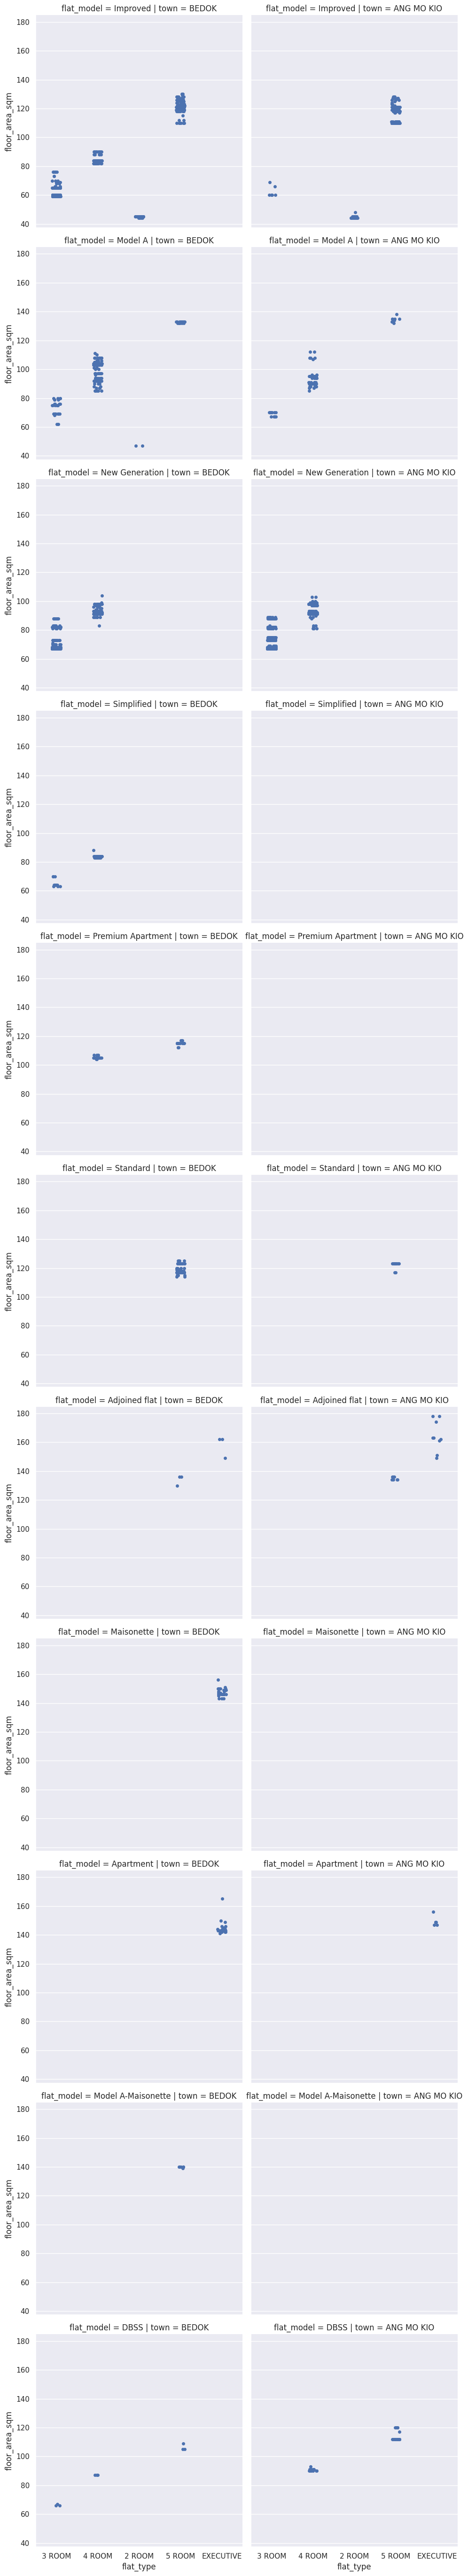

In [37]:
# You can also define another 'dimension' for the col (column) 
# This will take a bit of time to generate
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town', row='flat_model',
            data=df_subset)

# !! Your Turn !!

## Replace the code marked as <..> COMPLETELY with your own.
- The placeholder <..> is meant to be guidance for your answer.
- It should not be restricting your solutions for the questions.
- Feel free to add more lines or use less lines,
- One placeholder does not mean that you can only insert one line of codes.

# Question 1 
> Part A)

> Using os.listdir() method, list out the list of CSV files in **data > 0_raw_data > full > hdb_resale_datasets_by_years** <br/>\
Read them as separate dataframes and save them in a list variable called **dfs_resale_list**


In [38]:
os.listdir() #prints out current working directory
os.listdir('data/0_raw_data/full/hdb_resale_datasets_by_years') #prints out files in specific path
folder_path = 'data/0_raw_data/full/hdb_resale_datasets_by_years'
dfs_resale_list = []
for filename in os.listdir(folder_path): #loop through the files and save dataframes
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_resale_list.append(df_temp)
    print("appended " + filename + " with " + str(len(df_temp)) + " rows to the list of DataFrames")

appended 2013.csv with 16097 rows to the list of DataFrames
appended 2019.csv with 22186 rows to the list of DataFrames
appended 2012.csv with 20006 rows to the list of DataFrames
appended 2014.csv with 16096 rows to the list of DataFrames
appended 2017.csv with 20509 rows to the list of DataFrames
appended 2015.csv with 17780 rows to the list of DataFrames
appended 2016.csv with 19373 rows to the list of DataFrames
appended 2020.csv with 23340 rows to the list of DataFrames
appended 2021.csv with 9020 rows to the list of DataFrames
appended 2018.csv with 21561 rows to the list of DataFrames


> Part B): 
> - Concat the list of dataframes in **dfs_resale_list** and store dataframe in the variable **df_resale**
> - Make sure the row index is in sequential order. The last index should be **185967**.
> -  Print the **last 10 rows** of **df_resale**|

In [39]:
#concatenate dataframes
df_resale = pd.concat(dfs_resale_list)
#notice the index is off because it follows respective dataframes index
df_resale

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model
0,2013-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 03,44.0,Improved,1980,253000.0,2,"510, ANG MO KIO AVE 8",2013,1,2 ROOM Improved
1,2013-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,270000.0,2,"314, ANG MO KIO AVE 3",2013,1,2 ROOM Improved
2,2013-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1977,283000.0,5,"323, ANG MO KIO AVE 3",2013,1,2 ROOM Improved
3,2013-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,61.0,Improved,1986,305000.0,8,"170, ANG MO KIO AVE 4",2013,1,3 ROOM Improved
4,2013-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,320000.0,2,"174, ANG MO KIO AVE 4",2013,1,3 ROOM Improved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,2018-12,YISHUN,5 ROOM,760,YISHUN ST 72,10 TO 12,122.0,Improved,1987,470000.0,11,"760, YISHUN ST 72",2018,12,5 ROOM Improved
21557,2018-12,YISHUN,5 ROOM,816,YISHUN ST 81,04 TO 06,122.0,Improved,1988,500000.0,5,"816, YISHUN ST 81",2018,12,5 ROOM Improved
21558,2018-12,YISHUN,5 ROOM,844,YISHUN ST 81,10 TO 12,127.0,Improved,1988,500000.0,11,"844, YISHUN ST 81",2018,12,5 ROOM Improved
21559,2018-12,YISHUN,EXECUTIVE,665,YISHUN AVE 4,07 TO 09,164.0,Apartment,1992,708000.0,8,"665, YISHUN AVE 4",2018,12,EXECUTIVE Apartment


In [40]:
#concatenate dataframes
df_resale = pd.concat(dfs_resale_list, ignore_index=True) #concatenate dataframes
#notice the index is now correct
df_resale

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model
0,2013-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 03,44.0,Improved,1980,253000.0,2,"510, ANG MO KIO AVE 8",2013,1,2 ROOM Improved
1,2013-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,270000.0,2,"314, ANG MO KIO AVE 3",2013,1,2 ROOM Improved
2,2013-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1977,283000.0,5,"323, ANG MO KIO AVE 3",2013,1,2 ROOM Improved
3,2013-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,61.0,Improved,1986,305000.0,8,"170, ANG MO KIO AVE 4",2013,1,3 ROOM Improved
4,2013-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,320000.0,2,"174, ANG MO KIO AVE 4",2013,1,3 ROOM Improved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185963,2018-12,YISHUN,5 ROOM,760,YISHUN ST 72,10 TO 12,122.0,Improved,1987,470000.0,11,"760, YISHUN ST 72",2018,12,5 ROOM Improved
185964,2018-12,YISHUN,5 ROOM,816,YISHUN ST 81,04 TO 06,122.0,Improved,1988,500000.0,5,"816, YISHUN ST 81",2018,12,5 ROOM Improved
185965,2018-12,YISHUN,5 ROOM,844,YISHUN ST 81,10 TO 12,127.0,Improved,1988,500000.0,11,"844, YISHUN ST 81",2018,12,5 ROOM Improved
185966,2018-12,YISHUN,EXECUTIVE,665,YISHUN AVE 4,07 TO 09,164.0,Apartment,1992,708000.0,8,"665, YISHUN AVE 4",2018,12,EXECUTIVE Apartment


In [41]:
df_resale.tail(5)

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model
185963,2018-12,YISHUN,5 ROOM,760,YISHUN ST 72,10 TO 12,122.0,Improved,1987,470000.0,11,"760, YISHUN ST 72",2018,12,5 ROOM Improved
185964,2018-12,YISHUN,5 ROOM,816,YISHUN ST 81,04 TO 06,122.0,Improved,1988,500000.0,5,"816, YISHUN ST 81",2018,12,5 ROOM Improved
185965,2018-12,YISHUN,5 ROOM,844,YISHUN ST 81,10 TO 12,127.0,Improved,1988,500000.0,11,"844, YISHUN ST 81",2018,12,5 ROOM Improved
185966,2018-12,YISHUN,EXECUTIVE,665,YISHUN AVE 4,07 TO 09,164.0,Apartment,1992,708000.0,8,"665, YISHUN AVE 4",2018,12,EXECUTIVE Apartment
185967,2018-12,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,560000.0,11,"326, YISHUN RING RD",2018,12,EXECUTIVE Maisonette


# Question 2

> Part A): Create a new column **floor_area_sqft**, to store the floor area in squared feet\
> 💡Hint: 1 squared meter = 10.764 squared foot

In [ ]:
<..>

In [42]:
df_resale['floor_area_sqft'] = df_resale['floor_area_sqm'] * 10.764

In [43]:
df_resale

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model,floor_area_sqft
0,2013-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 03,44.0,Improved,1980,253000.0,2,"510, ANG MO KIO AVE 8",2013,1,2 ROOM Improved,473.616
1,2013-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,270000.0,2,"314, ANG MO KIO AVE 3",2013,1,2 ROOM Improved,473.616
2,2013-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1977,283000.0,5,"323, ANG MO KIO AVE 3",2013,1,2 ROOM Improved,473.616
3,2013-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,61.0,Improved,1986,305000.0,8,"170, ANG MO KIO AVE 4",2013,1,3 ROOM Improved,656.604
4,2013-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,320000.0,2,"174, ANG MO KIO AVE 4",2013,1,3 ROOM Improved,645.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185963,2018-12,YISHUN,5 ROOM,760,YISHUN ST 72,10 TO 12,122.0,Improved,1987,470000.0,11,"760, YISHUN ST 72",2018,12,5 ROOM Improved,1313.208
185964,2018-12,YISHUN,5 ROOM,816,YISHUN ST 81,04 TO 06,122.0,Improved,1988,500000.0,5,"816, YISHUN ST 81",2018,12,5 ROOM Improved,1313.208
185965,2018-12,YISHUN,5 ROOM,844,YISHUN ST 81,10 TO 12,127.0,Improved,1988,500000.0,11,"844, YISHUN ST 81",2018,12,5 ROOM Improved,1367.028
185966,2018-12,YISHUN,EXECUTIVE,665,YISHUN AVE 4,07 TO 09,164.0,Apartment,1992,708000.0,8,"665, YISHUN AVE 4",2018,12,EXECUTIVE Apartment,1765.296


2) Create a new column **price_per_sqft**, which is the price per squared foot of the particular resale unit

In [ ]:
<..>

In [44]:
df_resale['price_per_sqft'] = df_resale['resale_price'] / df_resale['floor_area_sqft']

3) Create a new column **hdb_age**, which is calculated based on current year minus the **lease_commence_date**

In [ ]:
<..>

In [45]:
from datetime import date
current_year = date.today().year
print(current_year)

df_resale['hdb_age'] = current_year - df_resale['lease_commence_date']

2023


# Question 3
> - Read **"flat_info_by_address.csv"** in the *data > 0_raw_data > full* into a dataframe and store in a variable **df_flat_info**
> - Print out the top 5 rows from **df_flat_info** 
> - Find the common column between **df_resale** and **df_flat_info**
> - Join the 2 dataFrames (**df_resale** and **df_flat_info**) together using left join and name the final dataframe **df**

In [ ]:
<..>

In [ ]:
<..>

In [ ]:
<..>

In [46]:
flat = 'data/0_raw_data/full/flat_info_by_address.csv'

df_flat_info = pd.read_csv(flat)

df_flat_info.head(5)

,address,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,...,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,N,N,N,198,0,...,993.314111,NaN,1.0,2.0,188.702345,1.0,4.0,8.0,40,84
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,N,N,N,191,0,...,939.807674,NaN,1.0,3.0,187.273600,1.0,2.0,11.0,50,100
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,N,N,N,84,0,...,885.863729,NaN,1.0,2.0,165.991020,1.0,5.0,8.0,40,84
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,N,N,N,23,0,...,786.447876,NaN,1.0,3.0,134.216983,1.0,4.0,10.0,39,113
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,N,N,N,187,0,...,1059.577046,NaN,NaN,3.0,385.235689,2.0,2.0,7.0,50,100


In [47]:
common_column = df_resale.columns.intersection(df_flat_info.columns)
print("Common Column", common_column)

Common Column Index(['address'], dtype='object')


In [48]:
df = df_resale.merge(df_flat_info, how='left', on='address')

# Question 4
> Part A):
> - Plot a chart to depict the distribution of **floor_area_sqm**
> - You can use any methods or packages

In [ ]:
<..>

In [ ]:
<..>

<Axes: ylabel='Frequency'>

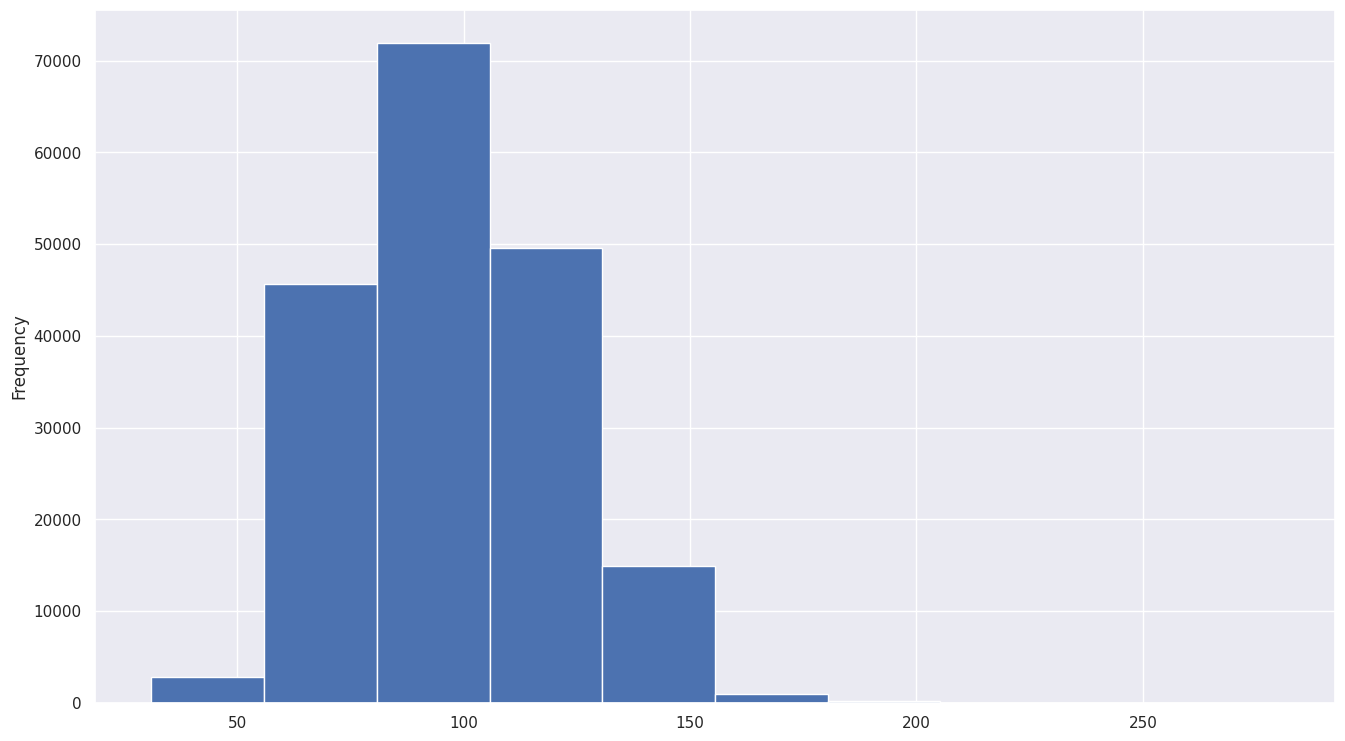

In [49]:
df['floor_area_sqm'].plot.hist()

> Part B):
> - Explore the relationship between the **storey_midpoint** and the **price_per_sqft** of the resale units

In [ ]:
<..>

<Axes: xlabel='storey_midpoint', ylabel='price_per_sqft'>

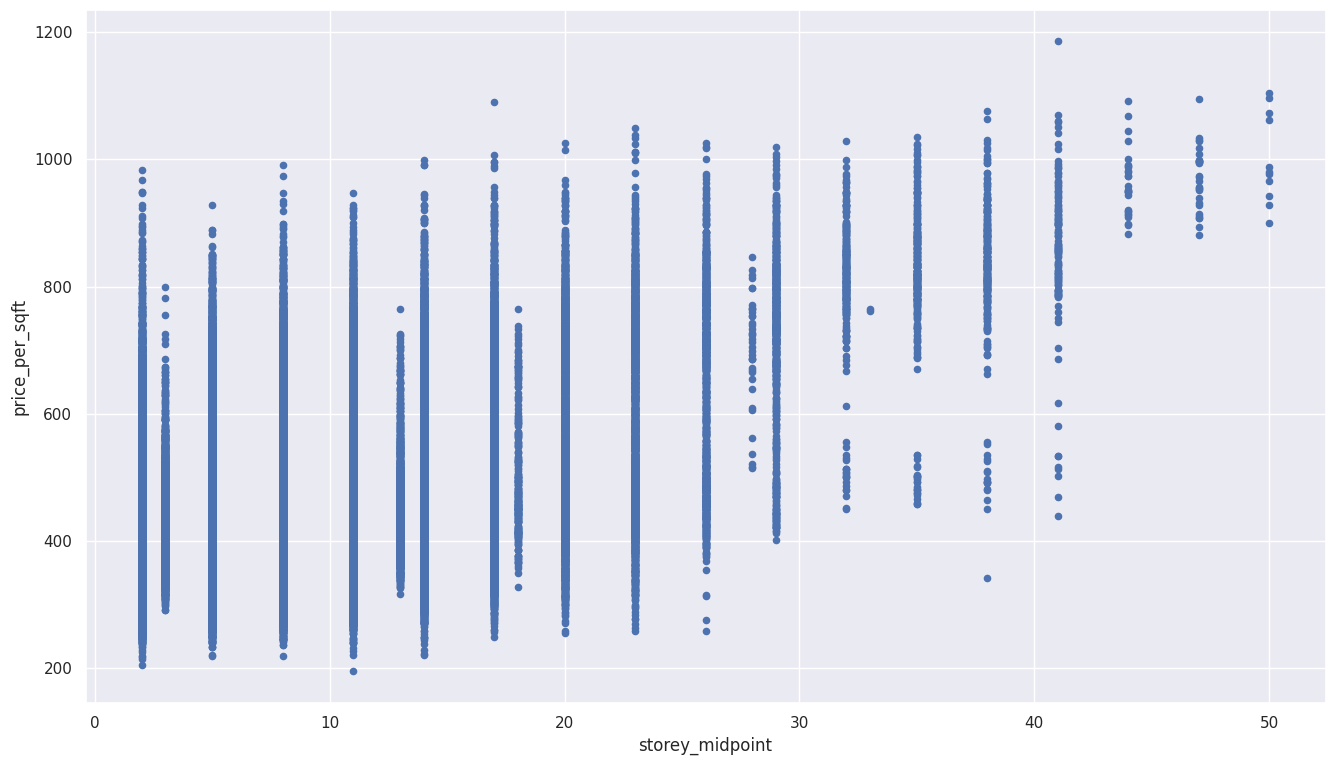

In [50]:
df.plot.scatter('storey_midpoint', 'price_per_sqft')

> Part C):
> - Create a new chart, by adding another field (i.e. dimension) to make further refinement to depict the relationship between the **storey_midpoint** and the **price_per_sqft**

In [ ]:
<..>

<Axes: xlabel='storey_midpoint', ylabel='price_per_sqft'>

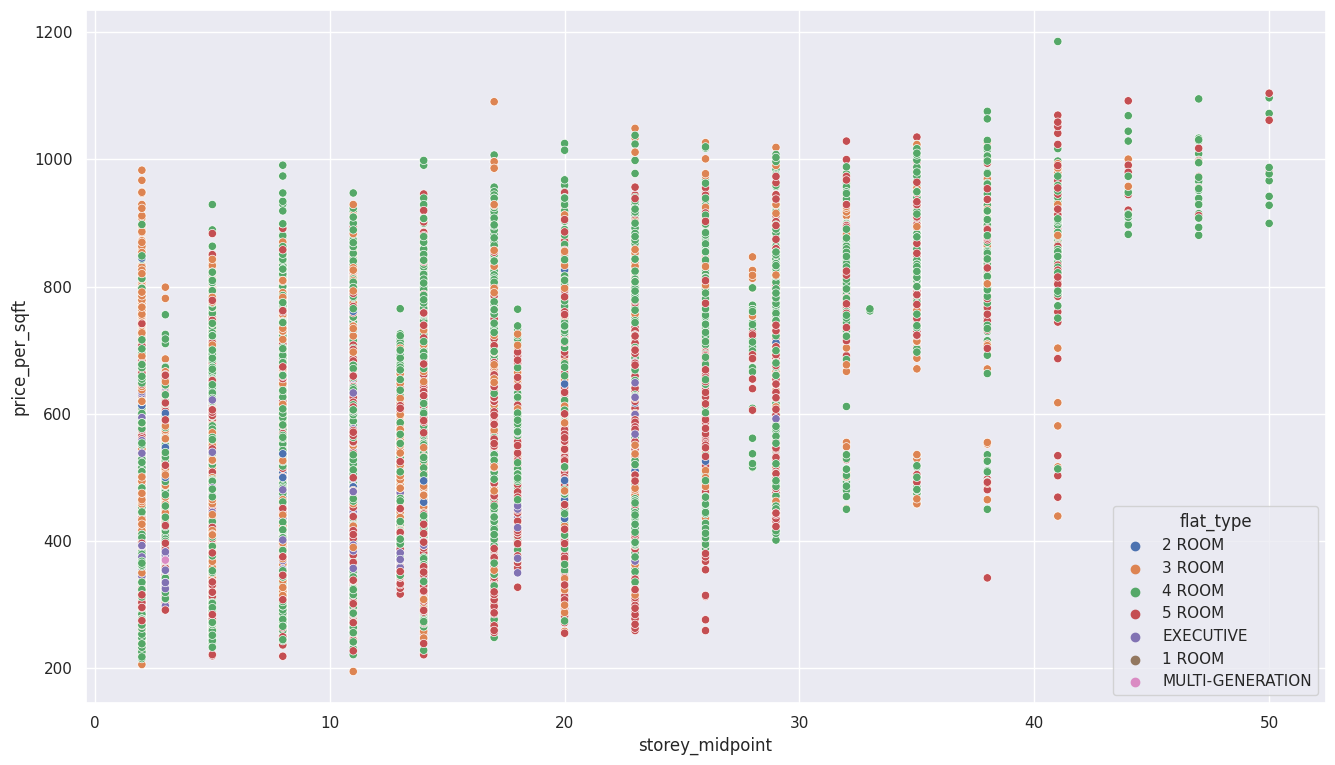

In [51]:
sns.scatterplot(x='storey_midpoint', y='price_per_sqft', hue='flat_type', data=df)

# Question 5

> - Plot a chart to depict the trend lines of price_per_sqft for the different towns

In [ ]:
<..>

<Axes: xlabel='town', ylabel='price_per_sqft'>

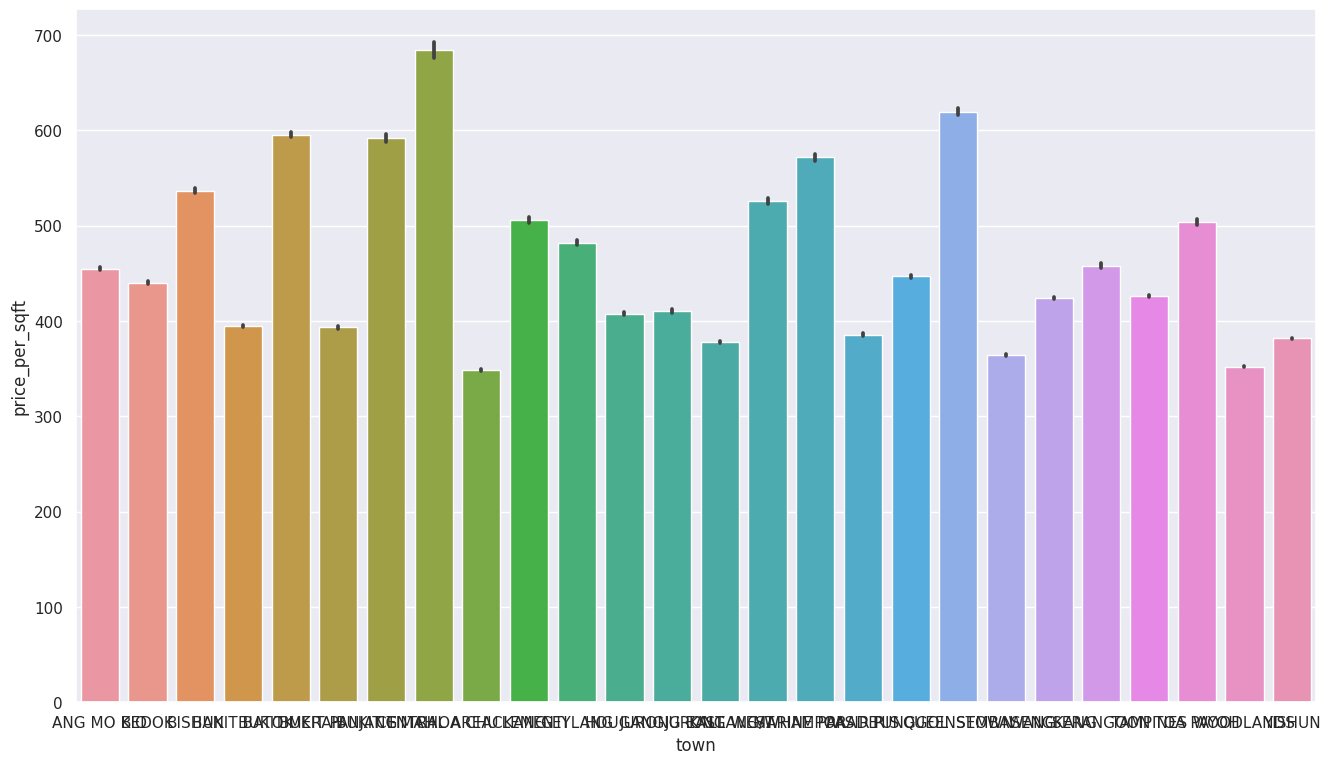

In [52]:
# Notice that no aggregation is required
sns.barplot(x='town', y='price_per_sqft', data=df)

# Question 6*

>Calculate the a column **percentage_difference_from_average**, which is the percentage difference of the unit's resale price over the average resale price of the same flat_type in the same town. </br>

>> For example, the average for "3 ROOM" flat type in ANG MO KIO is \\$324,380. </br>
For a particular HDB unit with resale price of $410,000, the percentage difference is .264, which means this particular unit is 26.4% more expensive than the average resale price of the same flat_type in the same town.

> The result would look like this:
> 
> ![](https://i.imgur.com/hoqjoGY.png)

### finding mean price for each town and flat_type

In [ ]:
<..>

In [53]:
groupby_town_flattype = df.groupby(['town','flat_type'])
groupby_town_flattype = groupby_town_flattype['resale_price'].mean()
groupby_town_flattype = groupby_town_flattype.reset_index()
groupby_town_flattype.columns = ['town', 'flat_type', 'avg_price_by_town_flat_type']
groupby_town_flattype

,town,flat_type,avg_price_by_town_flat_type
0,ANG MO KIO,2 ROOM,242418.615385
1,ANG MO KIO,3 ROOM,324380.775252
2,ANG MO KIO,4 ROOM,477254.230904
3,ANG MO KIO,5 ROOM,673624.661947
4,ANG MO KIO,EXECUTIVE,808776.633663
...,...,...,...
123,YISHUN,3 ROOM,297048.345005
124,YISHUN,4 ROOM,372609.786019
125,YISHUN,5 ROOM,480382.411392
126,YISHUN,EXECUTIVE,593859.443730


In [54]:
df = pd.merge(df, groupby_town_flattype, how='left', on=['town','flat_type'])
df['percentage_diff_from_average'] = (df['resale_price']) - df['avg_price_by_town_flat_type']/df['avg_price_by_town_flat_type']

# Question 7 
1) Save the fullhdbdf in **data > 1_processed_data** folder as <b>hdb_resale_full_processed.csv</b> <br/>

In [ ]:
<..>

In [55]:
export_folder_path = 'data/1_processed_data'
filename = 'hdb_resale_full_processed.csv'
df.to_csv(export_folder_path + '/' + filename, index=False)